In [9]:
import rocket_casadi
import control
import matplotlib.pyplot as plt
import numpy as np

0 states have been removed from the model
3 states have been removed from the model
0 states have been removed from the model
0.0 89.99999999999767 0.0 2.041144446399867e-15
1
max delay 769566470205182.0 s
gain margin 0.0
phase margin 89.99999999999767 degrees
inf 89.9999999999975 nan 7.279639043788798e-15
2
max delay 215779424961338.25 s
gain margin inf
phase margin 89.9999999999975 degrees
0.0 89.9999999999929 0.0 1.5296667652277335e-15
3
max delay 1026887922586796.8 s
gain margin 0.0
phase margin 89.9999999999929 degrees


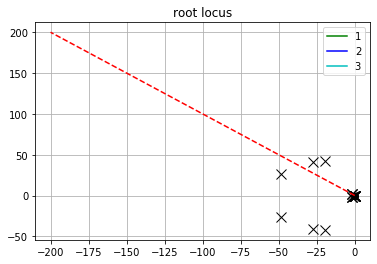

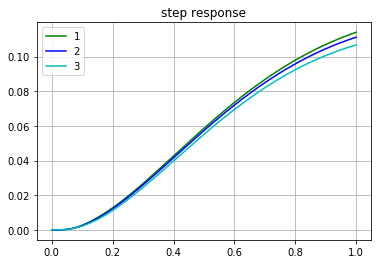

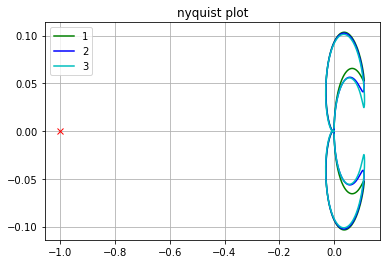

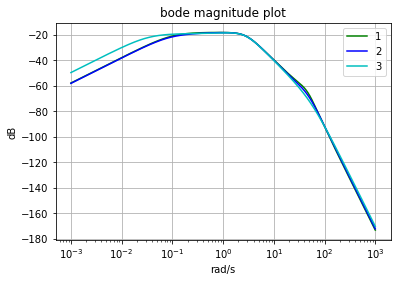

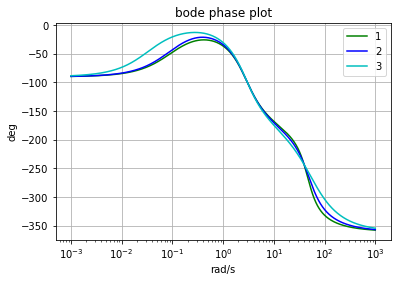

In [118]:
trim_points = [
    {'vt': 100, 'gamma_deg': 90, 'm_fuel': 0.8, 'color':'g', 'name':'1'},
    {'vt': 100, 'gamma_deg': 45, 'm_fuel': 0.5, 'color':'b', 'name':'2'},
    {'vt': 100, 'gamma_deg': 0, 'm_fuel': 0.2, 'color': 'c', 'name':'3'},
]

s = control.tf([1, 0], [0, 1])

# One Controller to rule them all, One Controller to find them,
# One Controller to bring them all, and in the rocket bind them
# H = 10*(s/100+1)*(s/100+1)/s  
H = ( 1/((s+2-2j)*(s+2+2j))) 

Go_list = []
for trim_point in trim_points:

    vt = trim_point['vt']
    gamma_deg = trim_point['gamma_deg']
    m_fuel = trim_point['m_fuel']

    x0, u0, p0 = rocket_casadi.do_trim(vt=vt, gamma_deg=gamma_deg, m_fuel=m_fuel)
    sys = control.ss(*rocket_casadi.linearize()(x0, u0, p0))

    G = sys[1, 2]/s;
    Go = control.minreal(G*H)
    Go_list.append(Go)

plt.figure()
plt.title('root locus')
handles = []
names = []
for trim_point, Go in zip(trim_points, Go_list):
    locus, omega = control.rlocus(Go, kvect=np.linspace(0, 1, 1000), Plot=False)
    handles.append(plt.plot(np.real(locus), np.imag(locus), color=trim_point['color'])[0])
    names.append(trim_point['name'])
    plt.plot(np.real(control.pole(Go)), np.imag(control.pole(Go)), 'kx', markersize='10')
    plt.plot(np.real(control.zero(Go)), np.imag(control.zero(Go)), 'ko', markersize='5')
plt.legend(handles, names)
plt.grid() 
plt.plot([0, -200], [0, 200], 'r--')

plt.figure()
plt.title('step response')
for trim_point, Go in zip(trim_points, Go_list):
    Gc = control.feedback(Go)
    t, y = control.step_response(Gc, T=np.linspace(0, 1, 1000))
    plt.plot(t, y, trim_point['color'], label=trim_point['name'])
plt.grid()
plt.legend()

plt.figure()
plt.title('nyquist plot')
for trim_point, Go in zip(trim_points, Go_list):
    real, imag, freq = control.nyquist(Go, omega=np.logspace(-3, 3, 1000), Plot=False)
    plt.plot(real, imag, trim_point['color'])
    plt.plot(real, -imag, trim_point['color'], label=trim_point['name'])
plt.plot(-1, 0, 'rx')
plt.grid()
# plt.axis([-10 10 -10 10])
plt.legend()

plt.figure()
plt.title('bode magnitude plot')
for trim_point, Go in zip(trim_points, Go_list):
    mag, phase, omega = control.bode(Go, omega=np.logspace(-3, 3, 1000), Plot=False)
    plt.semilogx(omega, 20*np.log10(mag), trim_point['color'], label=trim_point['name'])
plt.xlabel('rad/s')
plt.ylabel('dB')
plt.grid()
plt.legend()

plt.figure()
plt.title('bode phase plot')
for trim_point, Go in zip(trim_points, Go_list):
    mag, phase, omega = control.bode(Go, omega=np.logspace(-3, 3, 1000), Plot=False)
    plt.semilogx(omega, np.rad2deg(phase), trim_point['color'], label=trim_point['name'])
plt.xlabel('rad/s')
plt.ylabel('deg')
plt.grid()
plt.legend()

for trim_point, Go in zip(trim_points, Go_list):
    gm, pm, wg, wp = control.margin(Go)
    print(gm, pm, wg, wp)
    print(trim_point['name'])
    print('max delay', np.deg2rad(pm)/wp, 's')
    print('gain margin', gm)
    print('phase margin', pm, 'degrees')

In [119]:
control.minreal(Go_list[0])

0 states have been removed from the model



              2138 s^2 + 1.019e-10 s - 3.432e-12
--------------------------------------------------------------
s^6 + 42.61 s^5 + 2307 s^4 + 8678 s^3 + 1.632e+04 s^2 - 1682 s

In [110]:
control.minreal(Go_list[1])

0 states have been removed from the model



            2412 s^5 + 788.6 s^4 - 6.296e-12 s^3 - 5.42e-12 s^2 - 2.817e-26 s + 6.968e-28
-----------------------------------------------------------------------------------------------------
s^9 + 25.5 s^8 + 774.7 s^7 - 7.251e+04 s^6 - 2.046e+04 s^5 + 2400 s^4 + 1.256e-11 s^3 - 3.589e-13 s^2

In [105]:
control.minreal(Go_list[2])

0 states have been removed from the model



                      3015 s^3 + 1725 s^2 + 8.76e-11 s - 8.06e-13
----------------------------------------------------------------------------------------
s^7 + 57.13 s^6 - 500.5 s^5 - 9.24e+04 s^4 + 8.512e+05 s^3 + 5.586e+05 s^2 - 1.976e+04 s

0 states have been removed from the model
3 states have been removed from the model
0 states have been removed from the model
0.006444345923162772 90.17592000230144 5.526835585912837e-08 10.389902555983701
1
max delay 0.15148041106013638 s
gain margin 0.006444345923162772
phase margin 90.17592000230144 degrees
9.069545283696397e-05 87.74344924399776 7.435090029085431e-09 10.204547247687254
2
max delay 0.15007153665846054 s
gain margin 9.069545283696397e-05
phase margin 87.74344924399776 degrees
0.0027841220063513318 83.48078604923586 3.5469488730565634e-08 9.881143767912524
3
max delay 0.14745404104366366 s
gain margin 0.0027841220063513318
phase margin 83.48078604923586 degrees


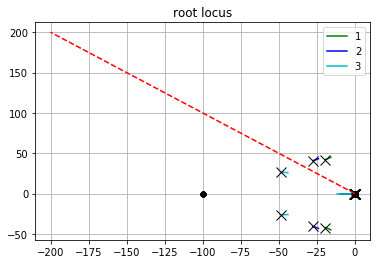

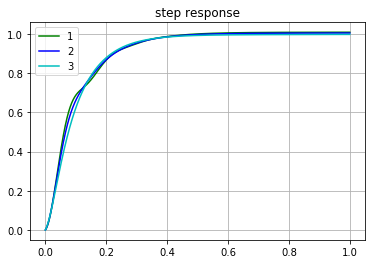

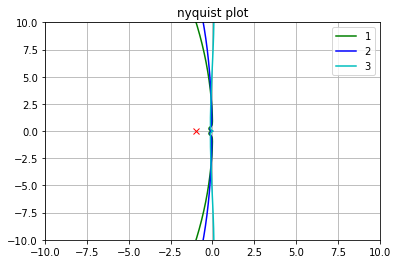

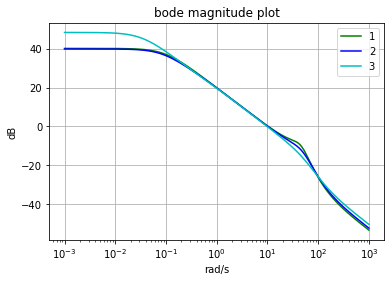

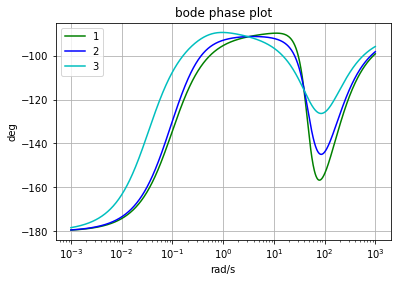

In [106]:
trim_points = [
    {'vt': 100, 'gamma_deg': 90, 'm_fuel': 0.8, 'color':'g', 'name':'1'},
    {'vt': 100, 'gamma_deg': 45, 'm_fuel': 0.5, 'color':'b', 'name':'2'},
    {'vt': 100, 'gamma_deg': 0, 'm_fuel': 0.2, 'color': 'c', 'name':'3'},
]

s = control.tf([1, 0], [0, 1])

# One Controller to rule them all, One Controller to find them,
# One Controller to bring them all, and in the rocket bind them
H = 10*(s/100+1)*(s/100+1)/s  

Go_list = []
for trim_point in trim_points:

    vt = trim_point['vt']
    gamma_deg = trim_point['gamma_deg']
    m_fuel = trim_point['m_fuel']

    x0, u0, p0 = rocket_casadi.do_trim(vt=vt, gamma_deg=gamma_deg, m_fuel=m_fuel)
    sys = control.ss(*rocket_casadi.linearize()(x0, u0, p0))

    G = sys[1, 2]/s;
    Go = control.minreal(G*H)
    Go_list.append(Go)

plt.figure()
plt.title('root locus')
handles = []
names = []
for trim_point, Go in zip(trim_points, Go_list):
    locus, omega = control.rlocus(Go, kvect=np.linspace(0, 1, 1000), Plot=False)
    handles.append(plt.plot(np.real(locus), np.imag(locus), color=trim_point['color'])[0])
    names.append(trim_point['name'])
    plt.plot(np.real(control.pole(Go)), np.imag(control.pole(Go)), 'kx', markersize='10')
    plt.plot(np.real(control.zero(Go)), np.imag(control.zero(Go)), 'ko', markersize='5')
plt.legend(handles, names)
plt.grid() 
plt.plot([0, -200], [0, 200], 'r--')

plt.figure()
plt.title('step response')
for trim_point, Go in zip(trim_points, Go_list):
    Gc = control.feedback(Go)
    t, y = control.step_response(Gc, T=np.linspace(0, 1, 1000))
    plt.plot(t, y, trim_point['color'], label=trim_point['name'])
plt.grid()
plt.legend()

plt.figure()
plt.title('nyquist plot')
for trim_point, Go in zip(trim_points, Go_list):
    real, imag, freq = control.nyquist(Go, omega=np.logspace(-3, 3, 1000), Plot=False)
    plt.plot(real, imag, trim_point['color'])
    plt.plot(real, -imag, trim_point['color'], label=trim_point['name'])
plt.plot(-1, 0, 'rx')
plt.grid()
plt.axis([-10, 10, -10, 10])
plt.legend()

plt.figure()
plt.title('bode magnitude plot')
for trim_point, Go in zip(trim_points, Go_list):
    mag, phase, omega = control.bode(Go, omega=np.logspace(-3, 3, 1000), Plot=False)
    plt.semilogx(omega, 20*np.log10(mag), trim_point['color'], label=trim_point['name'])
plt.xlabel('rad/s')
plt.ylabel('dB')
plt.grid()
plt.legend()

plt.figure()
plt.title('bode phase plot')
for trim_point, Go in zip(trim_points, Go_list):
    mag, phase, omega = control.bode(Go, omega=np.logspace(-3, 3, 1000), Plot=False)
    plt.semilogx(omega, np.rad2deg(phase), trim_point['color'], label=trim_point['name'])
plt.xlabel('rad/s')
plt.ylabel('deg')
plt.grid()
plt.legend()

for trim_point, Go in zip(trim_points, Go_list):
    gm, pm, wg, wp = control.margin(Go)
    print(gm, pm, wg, wp)
    print(trim_point['name'])
    print('max delay', np.deg2rad(pm)/wp, 's')
    print('gain margin', gm)
    print('phase margin', pm, 'degrees')

In [107]:
control.minreal(Go_list[0])

0 states have been removed from the model



2.138 s^4 + 427.6 s^3 + 2.138e+04 s^2 + 1.018e-09 s - 3.432e-11
---------------------------------------------------------------
            s^5 + 38.61 s^4 + 2145 s^3 - 210.2 s^2

In [95]:
control.minreal(Go_list[1])

0 states have been removed from the model



2.412 s^7 + 483.1 s^6 + 2.428e+04 s^5 + 7886 s^4 - 6.404e-11 s^3 - 5.42e-11 s^2 - 2.815e-25 s + 6.968e-27
---------------------------------------------------------------------------------------------------------
              s^8 + 55.5 s^7 + 2440 s^6 + 679.5 s^5 - 80 s^4 - 4.184e-13 s^3 + 1.196e-14 s^2

In [96]:
control.minreal(Go_list[2])

0 states have been removed from the model



3.015 s^5 + 604.7 s^4 + 3.049e+04 s^3 + 1.725e+04 s^2 + 8.758e-10 s - 8.06e-12
------------------------------------------------------------------------------
              s^6 + 97.13 s^5 + 3085 s^4 + 1853 s^3 - 65.87 s^2